In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Roboto&effect=3d|brick-sign|');
span {font-family:Roboto; color:black; text-shadow:4px 4px 4px #aaa;}  
h1,h2 {font-family:Roboto; color:slategray; text-shadow:4px 4px 4px #aaa;} 
div.output_subarea, div.output_area pre{font-family:Roboto; font_size:120%; color:darkblue;}
</style> 

In [2]:
import math, sympy, numpy
sympy.init_printing(use_unicode=True)
from sympy import *
from mpmath import *
from sympy.physics.vector import *

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import pylab as plt
import matplotlib
%matplotlib inline

[Computer Algebra I: Mathematica, SymPy, Sage, Maxima](http://hyperpolyglot.org/computer-algebra2)

[LaTeX/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[SymPy. Matrices](https://docs.sympy.org/latest/tutorial/matrices.html#eigenvalues-eigenvectors-and-diagonalization)

[Wolfram MathWorld. Linear Transformation](http://mathworld.wolfram.com/LinearTransformation.html)

[МЦНМО. Свободно распространяемые издания](https://www.mccme.ru/free-books/)

[ПРЕОБРАЗОВАНИЕ КООРДИНАТ ВЕКТОРА ПРИ ИЗМЕНЕНИИ БАЗИСА](http://twt.mpei.ac.ru/math/LARB/Linsp/LA_02090000e.html)

# Типовой расчет 16 / Standard Calculation 16

## Постановка  задачи / Formulation of the problem:

Дана матрица $A$ линейного оператора  в базисе $\{e_1, \ e_2, \ e_3\}$.

Найти матрицу этого оператора  в базисе $\{f_1, \ f_2, \ f_3\}$, если 

$\begin{cases}
f_1 = c_{11} e_1+ c_{12} e_2 + c_{13} e_3 \\
f_2 = c_{21} e_1+ c_{22} e_2 + c_{23} e_3 \\
f_3 = c_{31} e_1+ c_{32} e_2 + c_{33} e_3 
\end{cases}$.

МАТРИЦА ОПЕРАТОРА

$A = \begin{pmatrix}
-3 & -4 & -1 \\
4 & -3 & -3 \\
-3 & 2 & -6
\end{pmatrix}$

НОВЫЙ БАЗИС

$\begin{cases}
f_1 = e_1+ e_2 + e_3 \\
f_2 = 2 e_1+ 3 e_2 + 4 e_3 \\
f_3 = 3 e_1+ 5 e_2 + 8 e_3 
\end{cases}$.

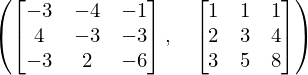

In [21]:
A = sympy.Matrix([[-3,-4,-1],[4,-3,-3],[-3,2,-6]])
C = sympy.Matrix([[1,1,1],[2,3,4],[3,5,8]])
A, C

## Решение / Decision

1) Запишем матрицу $C$ перехода от базиса $\{e_1, \ e_2, \ e_3\}$ к базису $\{f_1, \ f_2, \ f_3\}$.

$C = \begin{pmatrix}
1 & 1 & 1 \\
2 & 3 & 4 \\
3 & 5 & 8
\end{pmatrix}$

Вычислим определитель матрицы $C$.

Вычтем из 2-й и 3-й строки 1-ую, умноженную на 2 и 3 соответственно:

$C = \begin{pmatrix}
1 & 1 & 1 \\
0 & 1 & 2 \\
0 & 2 & 5
\end{pmatrix}$

Разложим по 1-му столбцу:

$\Delta_C = 1 * \begin{vmatrix} 1 & 2 \\ 2 & 5 \end{vmatrix} = 1 * 5 - 2 * 2 = 1$

In [22]:
C.det()

Вычислим матрицу алгебраических дополнений:
    
$C_S = \begin{pmatrix}
3 * 8 - 5 * 4 & -(2 * 8 - 3 * 4) & 2 * 5 - 3 * 3 \\
-(1 * 8 - 1 * 5) & 1 * 8 - 1 * 3 & -(1 * 5 - 1 * 3) \\
1 * 4 - 1 * 3& -(1 * 4 - 1 * 2) & 1 * 3 - 1 * 2
\end{pmatrix} = \begin{pmatrix}
4 & -4 & 1 \\
-3 & 5 & -2 \\
1 & -2 & 1
\end{pmatrix}$

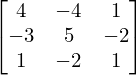

In [23]:
C.adjugate().T

Запишем транспонированную матрицу алгебраических дополнений:
    
$C_S^T = \begin{pmatrix}
4 & -3 & 1 \\
-4 & 5 & -2 \\
1 & -2 & 1
\end{pmatrix}$

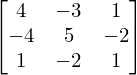

In [24]:
C.adjugate()

Вычислим обратную матрицу $C^{-1}$:

$C^{-1} = \frac{C_S^T}{\Delta_C} = \begin{pmatrix}
4 & -3 & 1 \\
-4 & 5 & -2 \\
1 & -2 & 1
\end{pmatrix} / 1 = \begin{pmatrix}
4 & -3 & 1 \\
-4 & 5 & -2 \\
1 & -2 & 1
\end{pmatrix}$

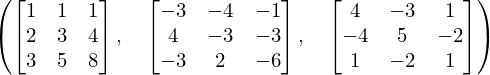

In [25]:
C, A, C.inv()

2) Найдем матрицу линейного оператора в новом базисе по формуле:
    
$\overline{A} = C * A * C^{-1}$.

$C * A = $

$= \begin{pmatrix}
1 * (-3)  + 1 * 4 + 1 * (-3) & 1 * (-4)  + 1 * (-3) + 1 * 2 & 1 * (-1)  + 1 * (-3) + 1 * (-6) \\
2 * (-3)  + 3 * 4 + 4 * (-3) & 2 * (-4)  + 3 * (-3) + 4 * 2 & 2 * (-1)  + 3 * (-3) + 4 * (-6) \\ 
3 * (-3)  + 5 * 4 + 8 * (-3) & 3 * (-4)  + 5 * (-3) + 8 * 2 & 3 * (-1)  + 5 * (-3) + 8 * (-6) \\
\end{pmatrix} =  $

$= \begin{pmatrix}
-2 & -5 & -10 \\
-6 & -9 & -35 \\ 
-13 & -11 & -66 \\
\end{pmatrix} $

In [26]:
1 * (-3)  + 1 * 4 + 1 * (-3), 1 * (-4)  + 1 * (-3) + 1 * 2 , 1 * (-1)  + 1 * (-3) + 1 * (-6)

In [27]:
2 * (-3)  + 3 * 4 + 4 * (-3), 2 * (-4)  + 3 * (-3) + 4 * 2, 2 * (-1)  + 3 * (-3) + 4 * (-6)

In [28]:
3 * (-3)  + 5 * 4 + 8 * (-3), 3 * (-4)  + 5 * (-3) + 8 * 2, 3 * (-1)  + 5 * (-3) + 8 * (-6)

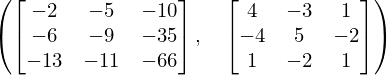

In [29]:
C * A, C.inv()

Теперь $C * A$ умножим на матрицу $C^{-1}$:

$\overline{A} = \begin{pmatrix}
-2 * 4 - 5 * (-4) - 10 * 1 & -2 * (-3) - 5 * 5 - 10 * (-2) & -2 * 1 - 5 * (-2) - 10 * 1 \\
-6 * 4 - 9* (-4) - 35 * 1 & -6 * (-3) - 9 * 5 - 35 * (-2) & -6 * 1 - 9 * (-2) - 35 * 1 \\ 
-13 * 4 - 11 * (-4) - 66 * 1 & -13 * (-3) - 11 * 5 - 66 * (-2) & -13 * 1 - 11 * (-2) - 66 * 1 \\
\end{pmatrix} $

$\overline{A} = \begin{pmatrix}
2 & 1 & -2 \\
-23 & 43 & -23 \\ 
-74 & 116 & -57 \\
\end{pmatrix} $

In [31]:
-2 * 4 - 5 * (-4) - 10 * 1, -2 * (-3) - 5 * 5 - 10 * (-2), -2 * 1 - 5 * (-2) - 10 * 1 

In [32]:
-6 * 4 - 9* (-4) - 35 * 1, -6 * (-3) - 9 * 5 - 35 * (-2), -6 * 1 - 9 * (-2) - 35 * 1

In [33]:
-13 * 4 - 11 * (-4) - 66 * 1, -13 * (-3) - 11 * 5 - 66 * (-2), -13 * 1 - 11 * (-2) - 66 * 1

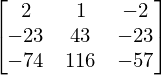

In [30]:
C * A * C.inv()

# Типовой расчет 17 / Standard Calculation 17

## Постановка  задачи / Formulation of the problem:

Линейный оператор переводит векторы $\mathfrak{e_1, \ e_2, \ e_3}$ в векторы $\mathfrak{f_1, \ f_2, \ f_3}$.

Найти, в какой вектор $\mathfrak{f}$ оператор переводит данный вектор $\mathfrak{e}$.

$\mathfrak{e_1} \{1; 3; 3\} \to \mathfrak{f_1}  \{1; 4; -2\}\\ 
\mathfrak{e_2} = (-3; -3; -2) \to \mathfrak{f_2} = (-2; -1; 2)\\ 
\mathfrak{e_3} = (-2; 2; 3) \to \mathfrak{f_3} = (4; 1; -2)$

$\mathfrak{e} = (-19; 7; 16)$

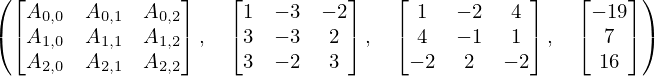

In [87]:
e123 = [1,3,3,-3,-3,-2,-2,2,3]; f123 = [1,4,-2,-2,-1,2,4,1,-2]
E = sympy.Matrix(3,3,e123).transpose()
F = sympy.Matrix(3,3,f123).transpose()
A = sympy.MatrixSymbol('A', 3, 3)
e = sympy.Matrix(3,1,[-19,7,16])
A.as_explicit(),E,F,e

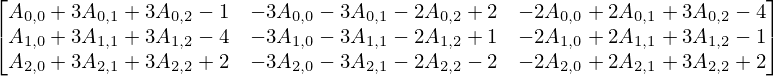

In [88]:
(A * E-F).as_explicit()

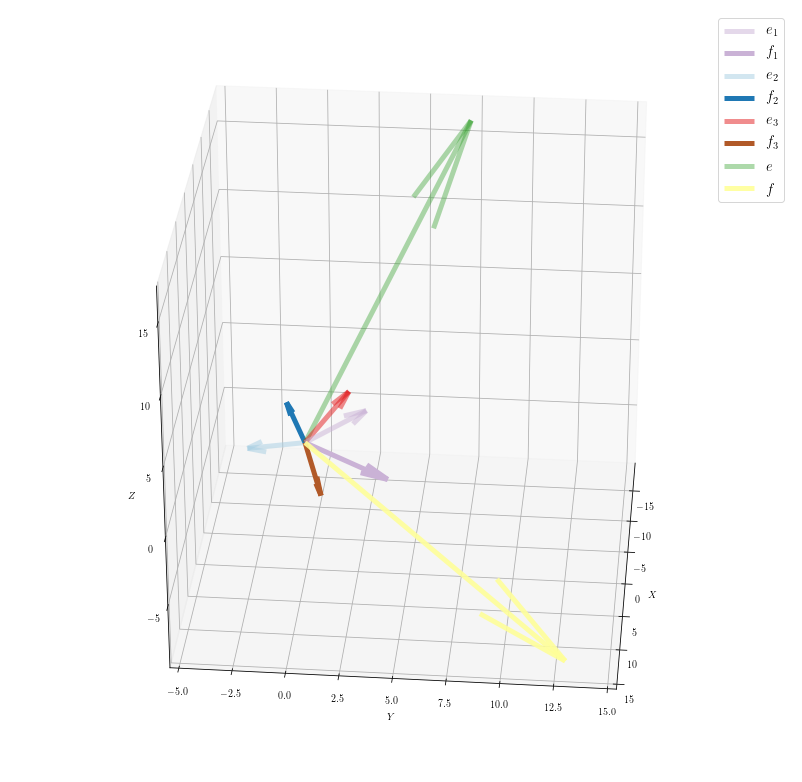

In [53]:
f = plt.figure(figsize=(14,14)); ax = f.add_subplot(111, projection='3d')
matplotlib.rcParams['text.usetex'] = True; matplotlib.rcParams['text.latex.unicode'] = True

c = numpy.arctan2([1,1,-3,-2,-2,4,-19,15], [3,4,-3,-1,2,1,7,13])
c = (c.ravel() - c.min()) / c.ptp()
c = numpy.concatenate((c, numpy.repeat(c, 2)))
c = plt.cm.Paired(c)
x, y, z =  [1,1,-3,-2,-2,4,-19,15], [3,4,-3,-1,2,1,7,13], [3,-2,-2,2,3,-2,16,-8]
l = [r'$e_1$',r'$f_1$',r'$e_2$',r'$f_2$',r'$e_3$',r'$f_3$',r'$e$',r'$f$']
a = [0.5,1,0.5,1,0.5,1,0.4,0.9]
for i in range(8):
    q = ax.quiver(0,0,0,x[i],y[i],z[i], colors=c[i], lw=5, alpha=a[i], label=l[i])

ax.set_xlim([-19,15]); ax.set_ylim([-5,15]); ax.set_zlim([-9,17])
ax.set_xlabel(r'$X$'); ax.set_ylabel(r'$Y$'); ax.set_zlabel(r'$Z$')
ax.legend(fontsize=15); ax.view_init(30,5);

## Решение / Decision

1) Обозначим $A$ - матрицу линейного оператора, и запишем систему уравнений:

$\begin{cases}
A \mathfrak{e_1} = \mathfrak{f_1} \\
A \mathfrak{e_2} = \mathfrak{f_2} \\
A \mathfrak{e_3} = \mathfrak{f_3} 
\end{cases} \iff \begin{cases}
A_{11} e_{11} + A_{12} e_{12} + A_{13} e_{13} = f_{11} \\
A_{21} e_{11} + A_{22} e_{12} + A_{23} e_{13} = f_{12} \\
A_{31} e_{11} + A_{32} e_{12} + A_{33} e_{13} = f_{13} \\
A_{11} e_{21} + A_{12} e_{22} + A_{13} e_{23} = f_{21} \\
A_{21} e_{21} + A_{22} e_{22} + A_{23} e_{23} = f_{22} \\
A_{31} e_{21} + A_{32} e_{22} + A_{33} e_{23} = f_{23} \\
A_{11} e_{31} + A_{12} e_{32} + A_{13} e_{33} = f_{31} \\
A_{21} e_{31} + A_{22} e_{32} + A_{23} e_{33} = f_{32} \\
A_{31} e_{31} + A_{32} e_{32} + A_{33} e_{33} = f_{33} \\
\end{cases}$

2) Найдем элементы матрицы $A$ .

Расширенная матрица для переменных 1-ой строки $A$ имеет вид:
    
$\left ( \begin{array} {ccc | c} 
1 & 3 & 3 & 1 \\
-3 & -3 & -2 & -2 \\
-2 & 2 & 3 & 4
\end{array} \right )$

Выполним элементарные преобразования:

$\left ( \begin{array} {ccc | c} 
1 & 3 & 3 & 1 \\
0 & 6 & 7 & 1 \\
0 & 8 & 9 & 6
\end{array} \right ) \iff
\left ( \begin{array} {ccc | c} 
1 & 3 & 3 & 1 \\
0 & 6 & 7 & 1 \\
0 & 2 & 2 & 5
\end{array} \right ) \iff$

$\iff \left ( \begin{array} {ccc | c} 
-2 & 0 & 1 & -1 \\
0 & 6 & 7 & 1 \\
0 & 0 & 1 & -14
\end{array} \right ) \iff
\left ( \begin{array} {ccc | c} 
-2 & 0 & 0 & 13 \\
0 & 6 & 0 & 99 \\
0 & 0 & 1 & -14
\end{array} \right ) \iff$

$\iff \left ( \begin{array} {ccc | c} 
1 & 0 & 0 &  -6.5 \\
0 & 1 & 0 & 16.5 \\
0 & 0 & 1 & -14
\end{array} \right ) \iff
(A_{11}; A_{12} ; A_{13}) = (-6.5; 16.5; -14)$

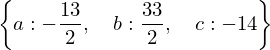

In [35]:
from sympy.abc import a,b,c
system = sympy.Matrix([ [1,3,3,1], [-3,-3,-2,-2], [-2,2,3,4] ])
sympy.solve_linear_system(system, a,b,c)

Расширенная матрица для переменных 2-ой строки $A$ имеет вид:
    
$\left ( \begin{array} {ccc | c} 
1 & 3 & 3 & 4 \\
-3 & -3 & -2 & -1 \\
-2 & 2 & 3 & 1
\end{array} \right )$

Выполним элементарные преобразования:

$\left ( \begin{array} {ccc | c} 
1 & 3 & 3 & 4 \\
0 & 6 & 7 & 11 \\
0 & 8 & 9 & 9
\end{array} \right ) \iff
\left ( \begin{array} {ccc | c} 
1 & 3 & 3 & 4 \\
0 & 6 & 7 & 11 \\
0 & 2 & 2 & -2
\end{array} \right ) \iff$

$\iff \left ( \begin{array} {ccc | c} 
-2 & 0 & 1 & 3 \\
0 & 6 & 7 & 11 \\
0 & 0 & 1 & 17
\end{array} \right ) \iff
\left ( \begin{array} {ccc | c} 
-2 & 0 & 0 & -14 \\
0 & 6 & 0 & -108 \\
0 & 0 & 1 & 17
\end{array} \right ) \iff$

$\iff \left ( \begin{array} {ccc | c} 
1 & 0 & 0 &  7 \\
0 & 1 & 0 & -18\\
0 & 0 & 1 & 17
\end{array} \right ) \iff
(A_{21}; A_{22} ; A_{23}) = (7; -18; 17)$

In [47]:
from sympy.abc import d,e,f
system = sympy.Matrix([ [1,3,3,4], [-3,-3,-2,-1], [-2,2,3,1] ])
sympy.solve_linear_system(system, d,e,f)

Расширенная матрица для переменных 3-й строки $A$ имеет вид:
    
$\left ( \begin{array} {ccc | c} 
1 & 3 & 3 & -2 \\
-3 & -3 & -2 & 2 \\
-2 & 2 & 3 & -2
\end{array} \right )$

Выполним элементарные преобразования:

$\left ( \begin{array} {ccc | c} 
1 & 3 & 3 & -2 \\
0 & 6 & 7 & -4 \\
0 & 8 & 9 & -6
\end{array} \right ) \iff
\left ( \begin{array} {ccc | c} 
1 & 3 & 3 & -2 \\
0 & 6 & 7 & -4 \\
0 & 2 & 2 & -2
\end{array} \right ) \iff$

$\iff \left ( \begin{array} {ccc | c} 
-2 & 0 & 1 & 0 \\
0 & 6 & 7 & -4 \\
0 & 0 & 1 & 2
\end{array} \right ) \iff
\left ( \begin{array} {ccc | c} 
-2 & 0 & 0 & -2 \\
0 & 6 & 0 & -18 \\
0 & 0 & 1 & 2
\end{array} \right ) \iff$

$\iff \left ( \begin{array} {ccc | c} 
1 & 0 & 0 &  1 \\
0 & 1 & 0 & -3\\
0 & 0 & 1 & 2
\end{array} \right ) \iff
(A_{31}; A_{32} ; A_{33}) = (1; -3; 2)$

In [48]:
from sympy.abc import g,h,i
system = sympy.Matrix([ [1,3,3,-2], [-3,-3,-2,2], [-2,2,3,-2] ])
sympy.solve_linear_system(system, g,h,i)

3) Применим линейный оператор к вектору $\mathfrak{e}$.

$A \mathfrak{e} = \mathfrak{f} \iff \begin{cases}
A_{11} e_{1} + A_{12} e_{2} + A_{13} e_{3} = f_{1} \\
A_{21} e_{1} + A_{22} e_{2} + A_{23} e_{3} = f_{2} \\
A_{31} e_{1} + A_{32} e_{2} + A_{33} e_{3} = f_{3} \\
\end{cases}$

$\begin{cases}
-6.5 * (-19) + 16.5 * 7 - 14 * 16 = 15 \\
7 * (-19) - 18 * 7 + 17 * 16 = 13 \\
1 * (-19) - 3 * 7 + 2 * 16 = -8 \\
\end{cases}$

$\mathfrak{f} = (15; 13; -8)$

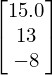

In [54]:
e = sympy.Matrix([-19,7,16])
A =  sympy.Matrix([[-6.5,16.5,-14], [7,-18,17], [1,-3,2]])
f = A * e
f

# Типовой расчет 18 / Standard Calculation 18

## Постановка  задачи / Formulation of the problem:

Найти собственные значения и собственные векторы линейного оператора,

заданного в некотором базисе данной матрицей, при условии,

что модуль одного из собственных значений равен 1.

$A = \begin{pmatrix}
-4 & -3 & -5 \\
5 & 4 & 5 \\
-7 & -7 & -6
\end{pmatrix}$

## Решение / Decision

1) Обозначим неизвестный собственный вектор матрицы $A: \overline{u} = (x, y, z)$,

а соответствующее ему собственное значение - $\lambda$.

В данном случае выполняется следующее равенство: 

$A \overline{u} = \lambda \overline{u} \iff 
\begin{pmatrix} -4 & -3 & -5 \\ 5 & 4 & 5 \\ -7 & -7 & -6 \end{pmatrix} * \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} \lambda x \\ \lambda y \\ \lambda z \end{pmatrix} \iff $

$\iff \begin{pmatrix} -4 - \lambda & -3 & -5 \\ 5 & 4 - \lambda & 5 \\ -7 & -7 & -6 - \lambda \end{pmatrix} * \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $ 

По определению,  собственный вектор $\overline{u} = (x, y, z) \neq (0, 0, 0) \implies$ 

$\iff \begin{vmatrix} -4 - \lambda & -3 & -5 \\ 5 & 4 - \lambda & 5 \\ -7 & -7 & -6 - \lambda \end{vmatrix} = 0$ 

Ко 1-й строке прибавим 2-ую:

$\begin{vmatrix} 1 - \lambda & 1 - \lambda & 0 \\ 5 & 4 - \lambda & 5 \\ -7 & -7 & -6 - \lambda \end{vmatrix} = 0$ 

Из 2-ого столбца вычтем 1-ый:

$\begin{vmatrix} 1 - \lambda & 0 & 0 \\ 5 & -1 - \lambda & 5 \\ -7 & 0 & -6 - \lambda \end{vmatrix} = 0$ 

Раскроем определитель по 2-му столбцу:

$( -1 - \lambda) \begin{vmatrix} 1 - \lambda & 0 \\  -7 & -6 - \lambda \end{vmatrix} = 0$

$( -1 - \lambda) * (1 - \lambda) * (-6 - \lambda) = 0$

$(\lambda + 1) * (\lambda - 1) * (\lambda + 6) = 0$

$\lambda_1 = -6 \lor \lambda_2 = -1\lor \lambda_3 = 1$

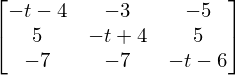

In [9]:
from sympy.abc import t
A = sympy.Matrix([[-4-t, -3, -5], [5, 4-t, 5], [-7, -7, -6-t]])
A

In [10]:
A.det()

In [11]:
solve(A.det(), t)

2) Найдем собственные векторы для каждого собственного значения.

$A \overline{u_1} = \lambda_1 \overline{u_1} \iff$

$\iff \begin{pmatrix} -4 - (-6) & -3 & -5 \\ 5 & 4 - (-6) & 5 \\ -7 & -7 & -6 - (-6) \end{pmatrix} * \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

$\iff \begin{pmatrix} 2 & -3 & -5 \\ 5 & 10 & 5 \\ -7 & -7 & 0 \end{pmatrix} * \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

Выполним тождественные преобразования.

$\iff \begin{pmatrix} 7 & 7 & 0 \\ 5 & 10 & 5 \\ -7 & -7 & 0 \end{pmatrix} * \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 1 & 1 & 0 \\ 1 & 2 & 1 \end{pmatrix} * \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 1 & 1 & 0 \\ 0 & 1 & 1 \end{pmatrix} * \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$x_1 + y_1 = 0 \ \& \ y_1 + z_1 = 0 \iff x_1 = - y_1= z_1$ 

Выберем произвольное значение $x_1 = 1$. 

Тогда собственный вектор для $\lambda_1 = - 6$ будет иметь вид: $\overline{u_1} = (1; -1; 1)  $

$A \overline{u_2} = \lambda_2 \overline{u_2} \iff$

$\iff \begin{pmatrix} -4 - (-1) & -3 & -5 \\ 5 & 4 - (-1) & 5 \\ -7 & -7 & -6 - (-1) \end{pmatrix} * \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

$\iff \begin{pmatrix} -3 & -3 & -5 \\ 5 & 5 & 5 \\ -7 & -7 & -5 \end{pmatrix} * \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

Выполним тождественные преобразования.

$\iff \begin{pmatrix} 2 & 2 & 0 \\ 5 & 5 & 5 \\ -2 & -2 & 0 \end{pmatrix} * \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 1 & 1 & 0 \\ 1 & 1 & 1 \end{pmatrix} * \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 1 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} * \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$x_2 + y_2 = 0 \ \& \ z_2 = 0 \iff x_2 = - y_2 \ \& \ z_2 = 0$ 

Выберем произвольное значение $y_2 = 1$. 

Тогда собственный вектор для $\lambda_2 = - 1$ будет иметь вид: $\overline{u_2} = (-1; 1; 0)  $

$A \overline{u_3} = \lambda_3 \overline{u_3} \iff$

$\iff \begin{pmatrix} -4 - 1 & -3 & -5 \\ 5 & 4 - 1& 5 \\ -7 & -7 & -6 - 1 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

$\iff \begin{pmatrix} -5 & -3 & -5 \\ 5 & 3 & 5 \\ -7 & -7 & -7 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $

Выполним тождественные преобразования.

$\iff \begin{pmatrix} 5 & 3 & 5 \\1 & 1 & 1 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 0 & -2 & 0 \\ 1 & 1 & 1 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 0 & 1 & 0 \\ 1 & 1 & 1 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$\iff \begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \end{pmatrix} * \begin{pmatrix} x_3 \\ y_3 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $ 

$x_3 + z_3 = 0 \ \& \ y_3 = 0 \iff x_3 = - z_3 \ \& \ y_3 = 0$ 

Выберем произвольное значение $z_3 = 1$. 

Тогда собственный вектор для $\lambda_3 = 1$ будет иметь вид: $\overline{u_3} = (-1; 0; 1)  $

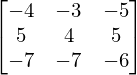

In [12]:
A = sympy.Matrix([[-4, -3, -5], [5, 4, 5], [-7, -7, -6]])
A

In [13]:
A.eigenvals()

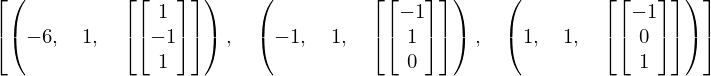

In [14]:
A.eigenvects()